# 画像解析

In [11]:
SEM_2week_before1 = cv2.imread('./../data/Microstructure/2week_1.bmp',0)
SEM_2week_before2 = cv2.imread('./../data/Microstructure/2week_2.bmp',0)
SEM_2week_before3 = cv2.imread('./../data/Microstructure/2week_3.bmp',0)
SEM_7week_before1 = cv2.imread('./../data/Microstructure/7week_1.bmp',0)
SEM_7week_before2 = cv2.imread('./../data/Microstructure/7week_2.bmp',0)
SEM_7week_before3 = cv2.imread('./../data/Microstructure/7week_3.bmp',0)

In [14]:
# 平滑化
num = (1,1)
num_2 = 1

img_gauss1 = cv2.GaussianBlur(SEM_2week_before1, num, num_2)
img_gauss2 = cv2.GaussianBlur(SEM_2week_before2, num, num_2)
img_gauss3 = cv2.GaussianBlur(SEM_2week_before3, num, num_2)
img_gauss4 = cv2.GaussianBlur(SEM_7week_before1, num, num_2)
img_gauss5 = cv2.GaussianBlur(SEM_7week_before2, num, num_2)
img_gauss6 = cv2.GaussianBlur(SEM_7week_before3, num, num_2)

# 2値化
thresh = 80
ret, img_thresh1 = cv2.threshold(img_gauss1, thresh, 255, cv2.THRESH_BINARY)
ret, img_thresh2 = cv2.threshold(img_gauss2, thresh, 255, cv2.THRESH_BINARY)
ret, img_thresh3 = cv2.threshold(img_gauss3, thresh, 255, cv2.THRESH_BINARY)
ret, img_thresh4 = cv2.threshold(img_gauss4, thresh, 255, cv2.THRESH_BINARY)
ret, img_thresh5 = cv2.threshold(img_gauss5, thresh, 255, cv2.THRESH_BINARY)
ret, img_thresh6 = cv2.threshold(img_gauss6, thresh, 255, cv2.THRESH_BINARY)


# 保存
# cv2.imwrite('Apple_binary_threshold/2week_1.bmp',img_thresh1)
# cv2.imwrite('Apple_binary_threshold/2week_2.bmp',img_thresh2)
# cv2.imwrite('Apple_binary_threshold/2week_3.bmp',img_thresh3)
# cv2.imwrite('Apple_binary_threshold/7week_1.bmp',img_thresh4)
# cv2.imwrite('Apple_binary_threshold/7week_2.bmp',img_thresh5)
# cv2.imwrite('Apple_binary_threshold/7week_3.bmp',img_thresh6)


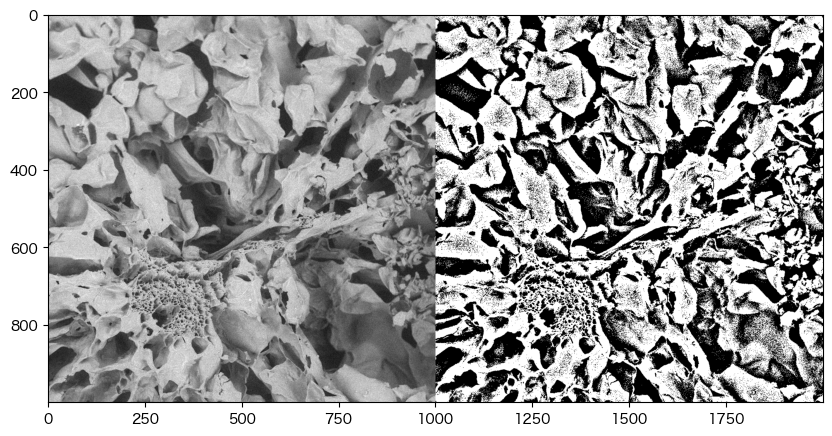

In [15]:
temp = img_gauss6
dst = cv2.adaptiveThreshold(temp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,111,3)

im_h = cv2.hconcat([temp, dst])
plt.figure(figsize=(10,10))
plt.imshow(im_h, cmap='gray')

In [18]:
def porosity_count(img):
        '''
        白黒のエリアをおのおの算出
        返り値：float, porosity(黒の面積)
        '''
        image_size = img.size
        whitePixels = cv2.countNonZero(img)
        blackPixels = image_size - whitePixels
 
        whiteAreaRatio = (whitePixels/image_size)*100#[%]
        blackAreaRatio = (blackPixels/image_size)*100#[%]
        
        return blackAreaRatio

In [19]:
poro_2 = [porosity_count(img_thresh1),porosity_count(img_thresh2),porosity_count(img_thresh3)]
poro_7 = [porosity_count(img_thresh4),porosity_count(img_thresh5),porosity_count(img_thresh6)]

In [20]:
print(f'porosity of 2week is {np.mean([poro_2]):.3f} ± {np.std([poro_2]):.3f}')
print()
print(f'porosity of 7week is {np.mean([poro_7]):.3f} ± {np.std([poro_7]):.3f}')

porosity of 2week is 23.169 ± 1.734

porosity of 7week is 16.519 ± 1.447


In [22]:
# t検定

import math
import pandas as pd
import scipy.stats as st

xa = pd.Series(poro_2)
xb = pd.Series(poro_7)

t, p = st.ttest_ind(xa, xb, equal_var=False)
MU = abs(xa.mean()-xb.mean())
SE =  MU/t
DF = len(xa)+len(xb)-2
CI = st.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )

print('対応なしt検定')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')
print(f'自由度 = {DF}')
print(f'平均値の差   = {MU:.2f}')
print(f'差の標準誤差 = {SE:.2f}')
print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')

対応なしt検定
p値 = 0.015
t値 = 4.16
自由度 = 4
平均値の差   = 6.65
差の標準誤差 = 1.60
平均値の差の95%信頼区間CI = [2.22 , 11.08]
